# Titanic Dataset EDA & Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

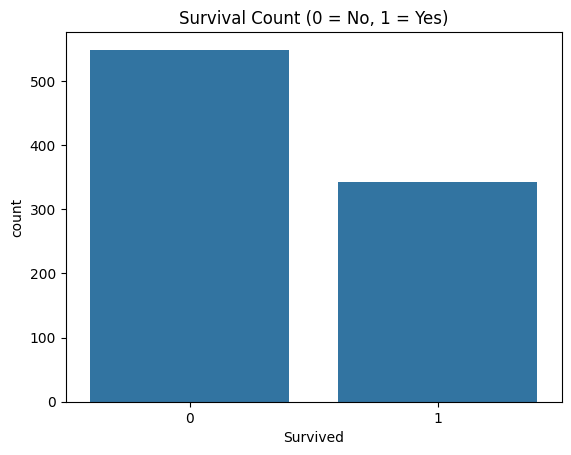

In [4]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

Insight:

The number of passengers who did not survive (0) is significantly higher than those who did survive (1).
This highlights the overall severity of the Titanic disaster — survival was not the majority outcome.

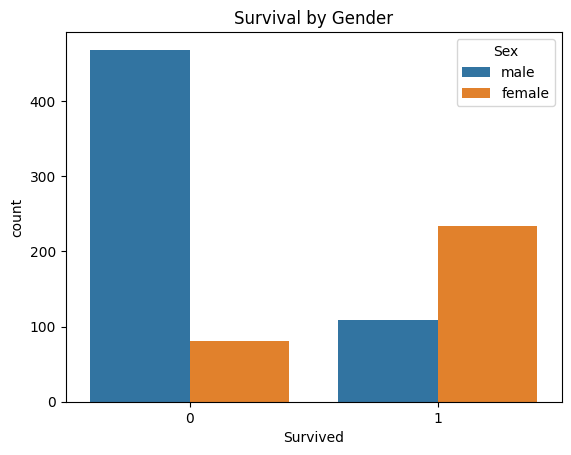

In [5]:
# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

Insight:

A much higher proportion of women survived compared to men.
This supports the known "women and children first" evacuation strategy used during the sinking.

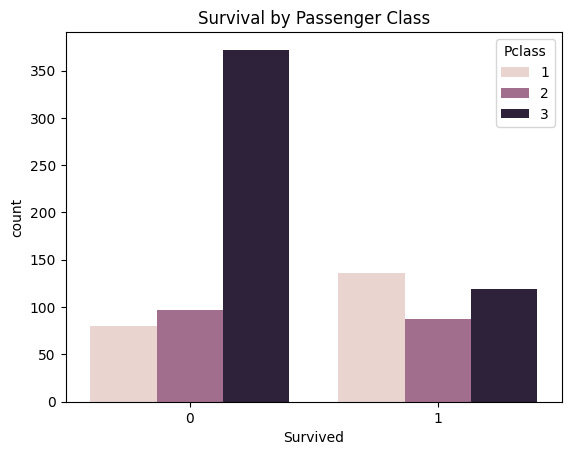

In [6]:
# Survival by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

Insight:

First-class passengers had a noticeably higher survival rate.
Third-class passengers had the highest fatality rate.
This shows the socioeconomic disparity in survival chances.

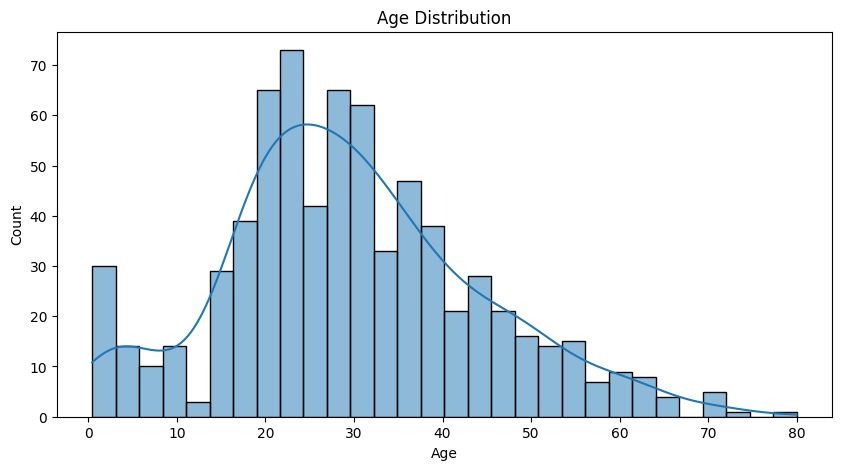

In [7]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Insight:

The majority of passengers were between 20 and 40 years old.
A small number of infants and children were on board.
The distribution is slightly right-skewed — meaning fewer elderly passengers.

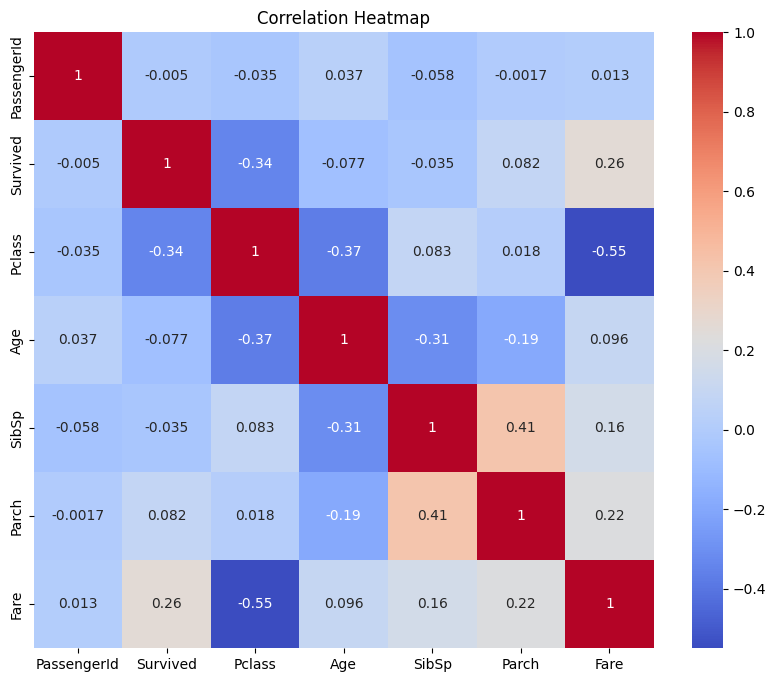

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Insight:

Survival is negatively correlated with Pclass → Lower-class passengers had lower survival.
Survival is positively correlated with Fare → Higher fare = better survival chances.
Weak correlation with Age, SibSp, Parch → Slight effects, but not major predictors.

## Fare Distribution

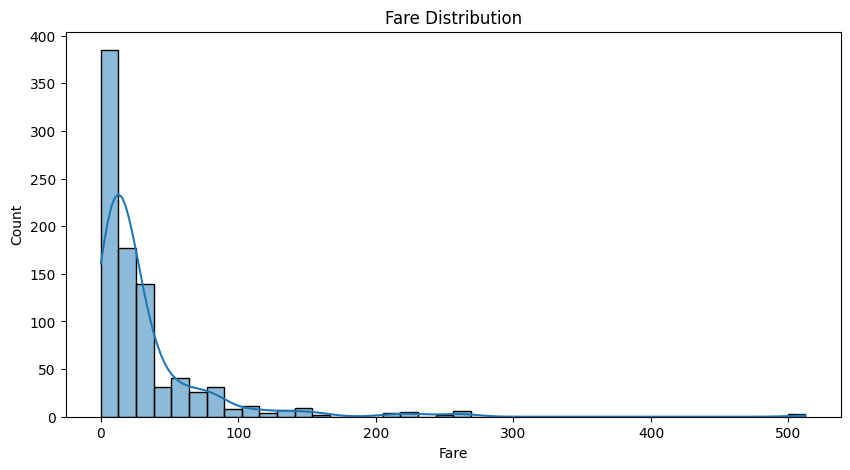

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

Insight:

Most passengers paid a fare under $100, with a spike around $10–$30.
Some first-class tickets were extremely expensive (up to $500+), indicating luxurious accommodations.

## Survival by Age and Fare (Scatterplot)

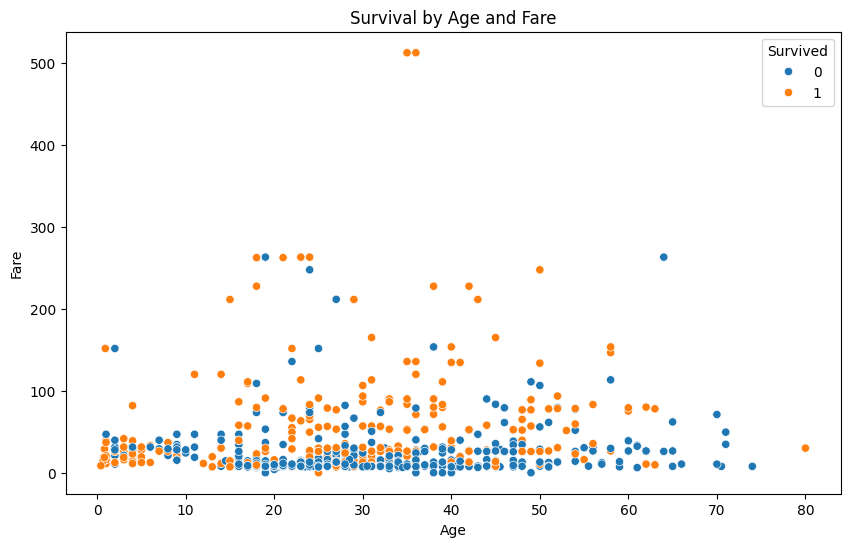

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Survival by Age and Fare")
plt.show()

Insight:

Survivors tend to cluster around lower fares and younger age groups, but some high-fare passengers (likely first class) also survived.
There's a dense cluster of non-survivors with low fares, mostly third-class passengers.

## Boxplot of Age by Pclass and Survival

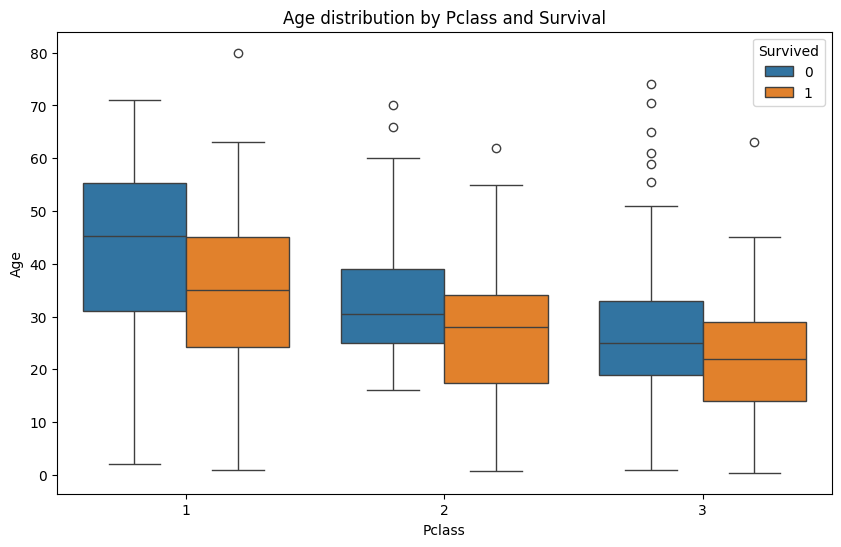

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title("Age distribution by Pclass and Survival")
plt.show()

Insight:

In first class, both survivors and non-survivors span a wider age range, including more older passengers.
Third-class survivors are mostly younger, likely children or young adults.
This reveals how age and class together impacted survival.

## Violin Plot: Fare by Pclass and Survival

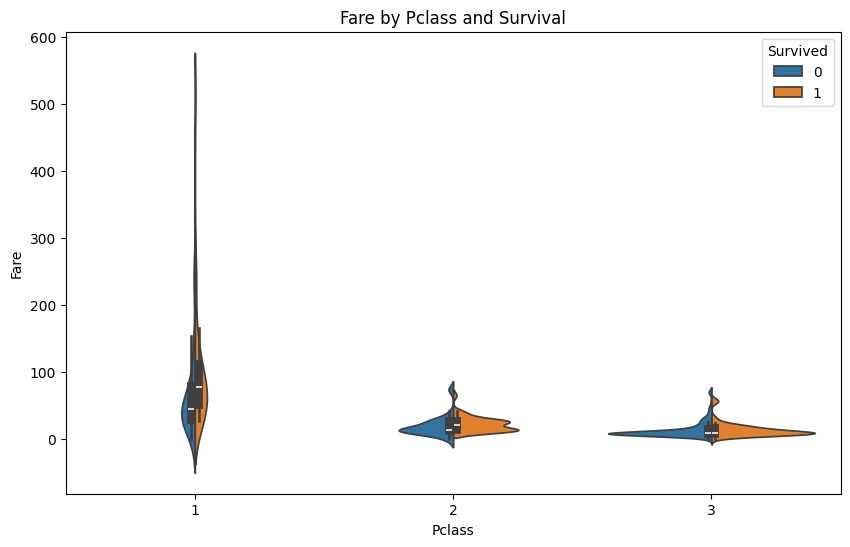

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', split=True, data=df)
plt.title("Fare by Pclass and Survival")
plt.show()

Insight:

The fare distribution for 1st class is broad, with a higher concentration of survivors at the higher fare end.
In 3rd class, the fares are lower, and the majority of passengers did not survive.
Shows strong class-based economic inequality influencing survival.